In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False


In [4]:
# 각각 season별 데이터 불러오기
bat = pd.read_csv('../data/raw/kbo_batting_stats_by_season_1982-2025.csv')
pitch = pd.read_csv('../data/raw/kbo_pitching_stats_by_season_1982-2025.csv')

In [5]:
import os

os.makedirs('../data/processed', exist_ok=True)


In [6]:
# 분석 대상 팀 / 연도
teams = ['한화', 'LG', 'KIA', 'SSG','삼성','키움','두산','롯데','NC','KT']
years = [2021,2022,2023, 2024, 2025]

# 필터링
bat_analysis = (
    bat[bat['Team'].isin(teams)]
    .loc[bat['Year'].isin(years)]
    .loc[bat['PA'] >= 50]
)

pitch_analysis = (
    pitch[pitch['Team'].isin(teams)]
    .loc[pitch['Year'].isin(years)]
    .loc[pitch['IP'] >= 30]
)

# 저장
bat_analysis.to_csv(
    '../data/processed/bat_analysis_pa50_all_2021_2025.csv',
    index=False
)

pitch_analysis.to_csv(
    '../data/processed/pitch_analysis_ip30_all_2021_2025.csv',
    index=False
)


In [8]:
bat = pd.read_csv('../data/processed/bat_analysis_pa50_2023_2025.csv')
pitch = pd.read_csv('../data/processed/pitch_analysis_ip30_2023_2025.csv')

In [9]:
hanwha_bat = bat[bat['Team'] == '한화']
hanwha_pitch = pitch[pitch['Team'] == '한화']

In [10]:
hanwha_bat.groupby('Year')[['OBP','SLG','wRC+','WAR']].mean()

,OBP,SLG,wRC+,WAR
Year,,,,
2023,0.301350,0.316850,71.675000,0.800500
2024,0.336952,0.373619,85.457143,0.646667
2025,0.329529,0.375941,93.294118,1.262353


In [11]:
hanwha_pitch.groupby('Year')[['ERA','FIP','WAR']].mean()

,ERA,FIP,WAR
Year,,,
2023,4.414118,4.244118,0.811176
2024,4.976667,4.865000,1.016667
2025,3.646429,3.836429,2.212143


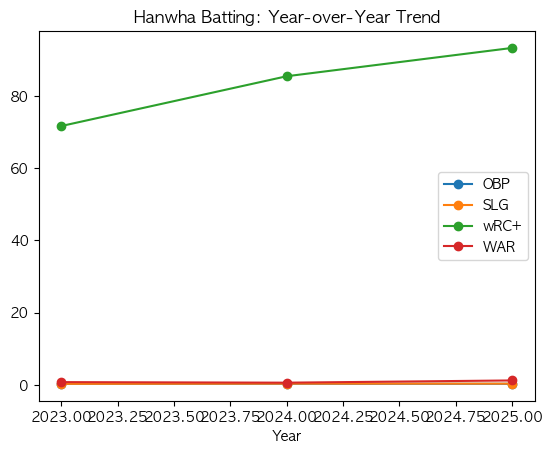

In [12]:
import matplotlib.pyplot as plt

hanwha_bat.groupby('Year')[['OBP','SLG','wRC+','WAR']].mean().plot(
    marker='o'
)
plt.title('Hanwha Batting: Year-over-Year Trend')
plt.show()


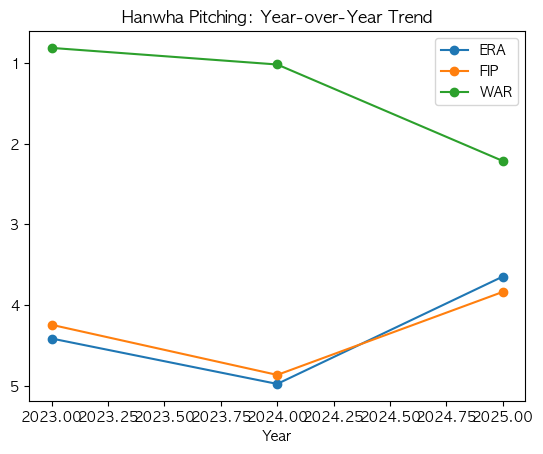

In [13]:
hanwha_pitch.groupby('Year')[['ERA','FIP','WAR']].mean().plot(
    marker='o'
)
plt.title('Hanwha Pitching: Year-over-Year Trend')
plt.gca().invert_yaxis()  # ERA/FIP는 낮을수록 좋음
plt.show()


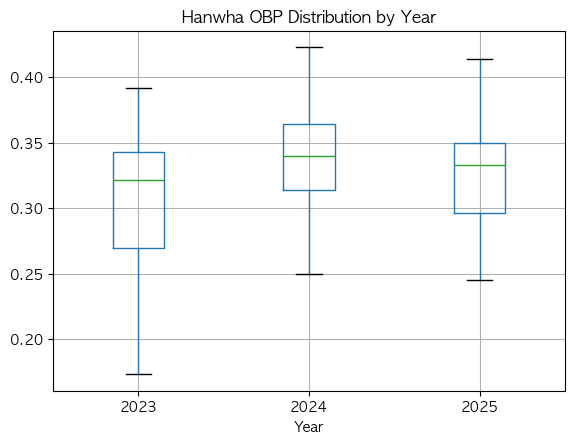

In [14]:
hanwha_bat.boxplot(column='OBP', by='Year')
plt.title('Hanwha OBP Distribution by Year')
plt.suptitle('')
plt.show()


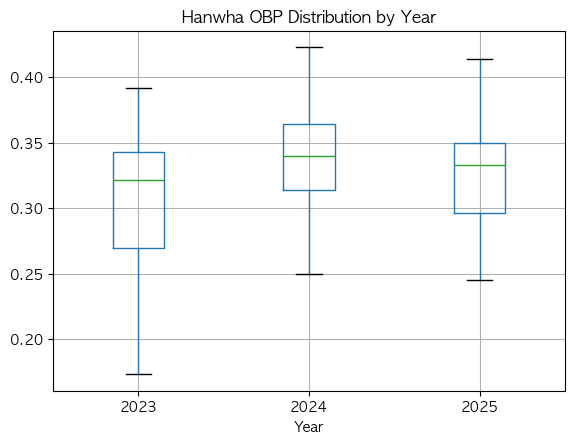

In [15]:
hanwha_bat.boxplot(column='OBP', by='Year')
plt.title('Hanwha OBP Distribution by Year')
plt.suptitle('')
plt.show()


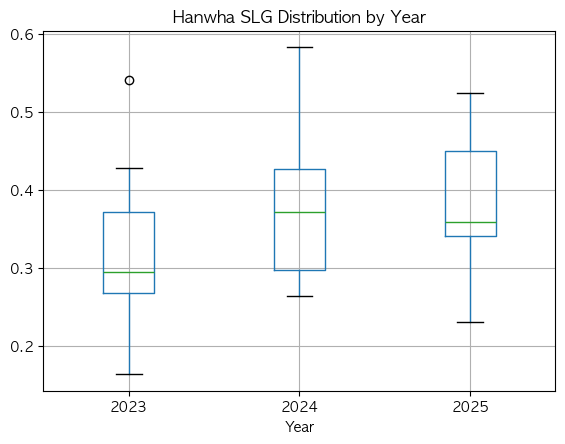

In [16]:
hanwha_bat.boxplot(column='SLG', by='Year')
plt.title('Hanwha SLG Distribution by Year')
plt.suptitle('')
plt.show()


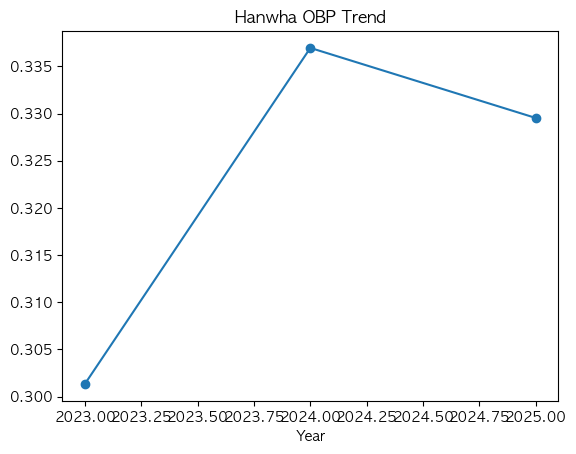

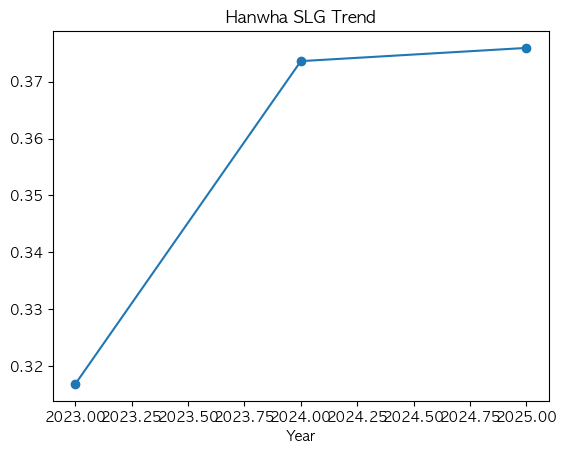

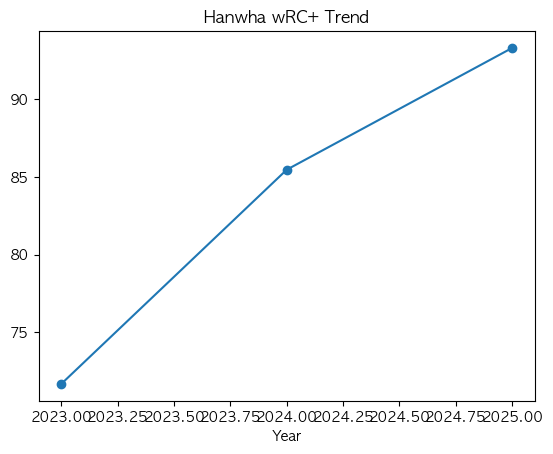

In [17]:
hanwha_bat.groupby('Year')['OBP'].mean().plot(marker='o', title='Hanwha OBP Trend')
plt.show()

hanwha_bat.groupby('Year')['SLG'].mean().plot(marker='o', title='Hanwha SLG Trend')
plt.show()

hanwha_bat.groupby('Year')['wRC+'].mean().plot(marker='o', title='Hanwha wRC+ Trend')
plt.show()


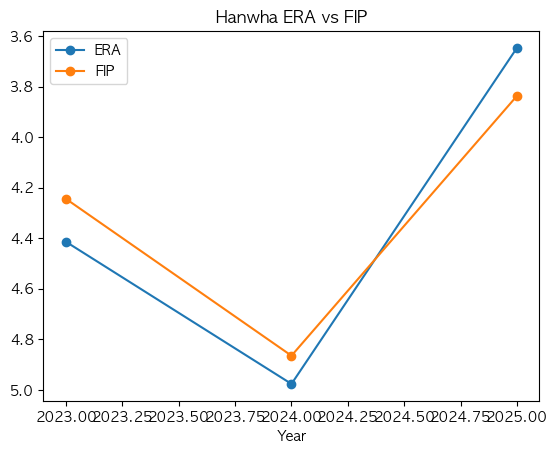

In [83]:
hanwha_pitch.groupby('Year')[['ERA','FIP']].mean().plot(marker='o')
plt.gca().invert_yaxis()
plt.title('Hanwha ERA vs FIP')
plt.show()


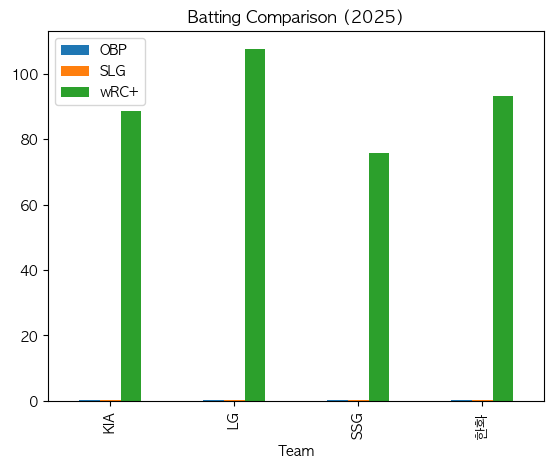

In [84]:
bat_team_year = bat.groupby(['Team','Year'])[['OBP','SLG','wRC+']].mean().reset_index()

bat_2025 = bat_team_year[bat_team_year['Year'] == 2025]

bat_2025.set_index('Team')[['OBP','SLG','wRC+']].plot(kind='bar')
plt.title('Batting Comparison (2025)')
plt.show()


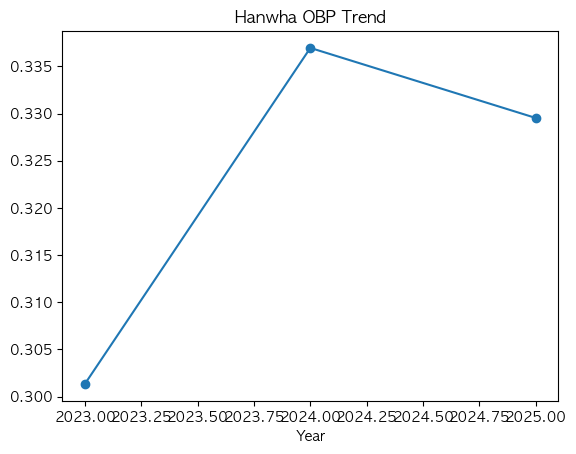

In [85]:
hanwha_bat.groupby('Year')['OBP'].mean().plot(marker='o', title='Hanwha OBP Trend')
plt.show()

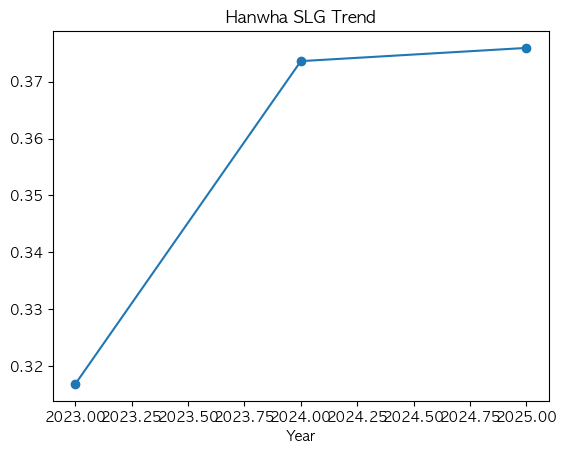

In [86]:
hanwha_bat.groupby('Year')['SLG'].mean().plot(marker='o', title='Hanwha SLG Trend')
plt.show()


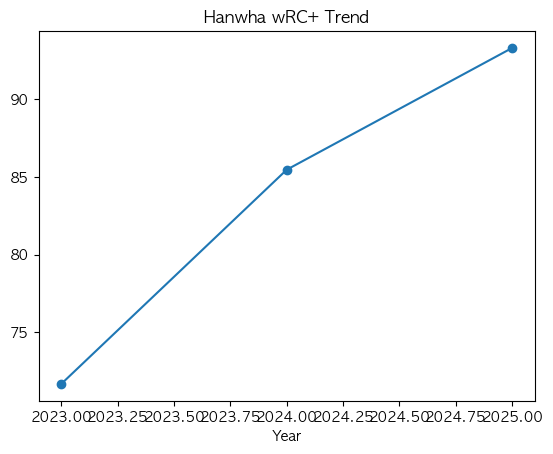

In [87]:
hanwha_bat.groupby('Year')['wRC+'].mean().plot(marker='o', title='Hanwha wRC+ Trend')
plt.show()


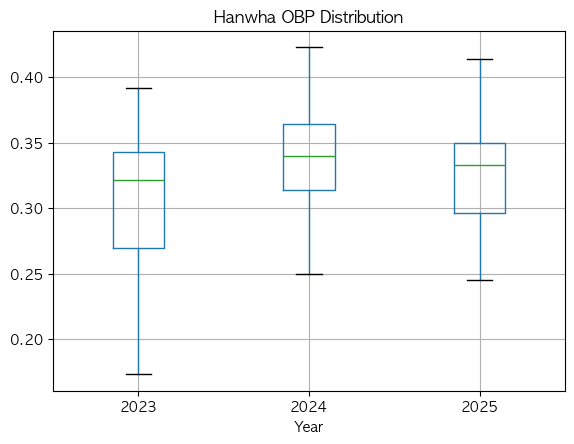

In [88]:
hanwha_bat.boxplot(column='OBP', by='Year')
plt.title('Hanwha OBP Distribution')
plt.suptitle('')
plt.show()


In [2]:
import matplotlib.pyplot as plt

# 연도별 평균 OBP 계산
obp_by_year = hanwha_bat.groupby('Year')['OBP'].mean()

# 막대그래프
obp_by_year.plot(kind='bar')

plt.title('Hanwha Average OBP by Year')
plt.xlabel('Year')
plt.ylabel('OBP')
plt.show()


NameError: name 'hanwha_bat' is not defined

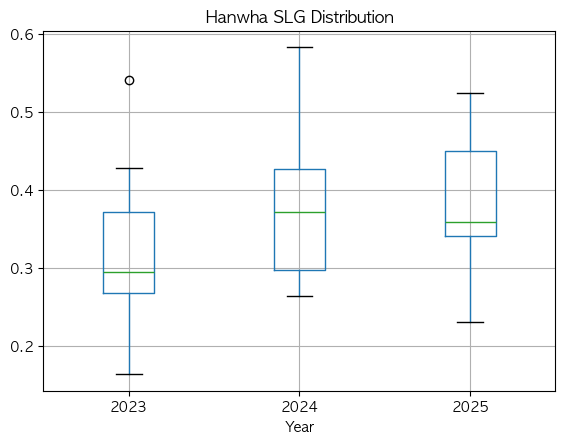

In [89]:
hanwha_bat.boxplot(column='SLG', by='Year')
plt.title('Hanwha SLG Distribution')
plt.suptitle('')
plt.show()


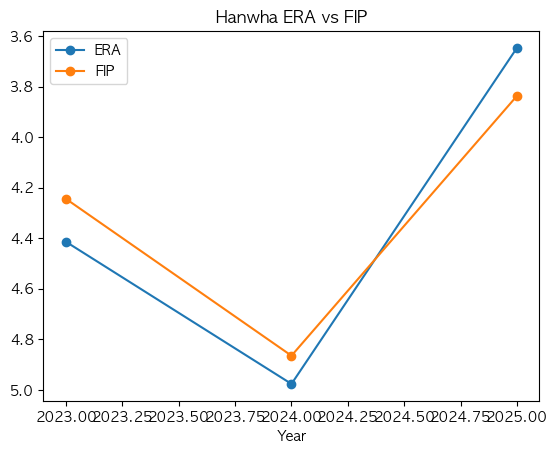

In [90]:
hanwha_pitch.groupby('Year')[['ERA','FIP']].mean().plot(marker='o')
plt.gca().invert_yaxis()
plt.title('Hanwha ERA vs FIP')
plt.show()


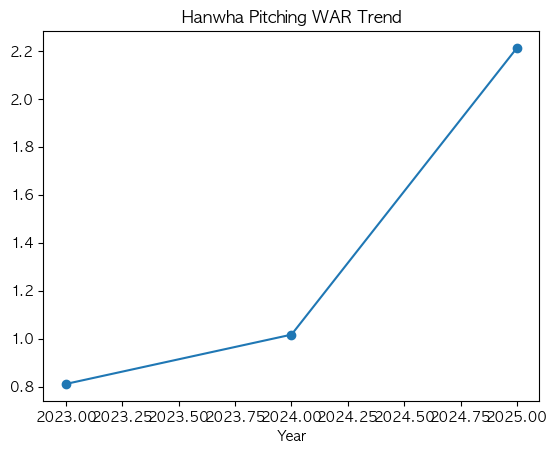

In [91]:
hanwha_pitch.groupby('Year')['WAR'].mean().plot(marker='o', title='Hanwha Pitching WAR Trend')
plt.show()


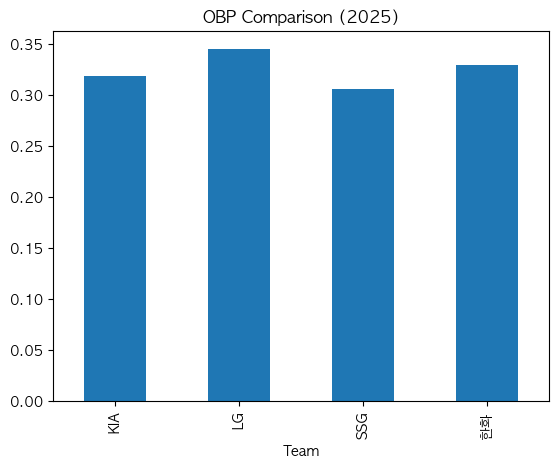

In [92]:
bat_2025 = bat[bat['Year'] == 2025]
bat_2025.groupby('Team')['OBP'].mean().plot(kind='bar', title='OBP Comparison (2025)')
plt.show()


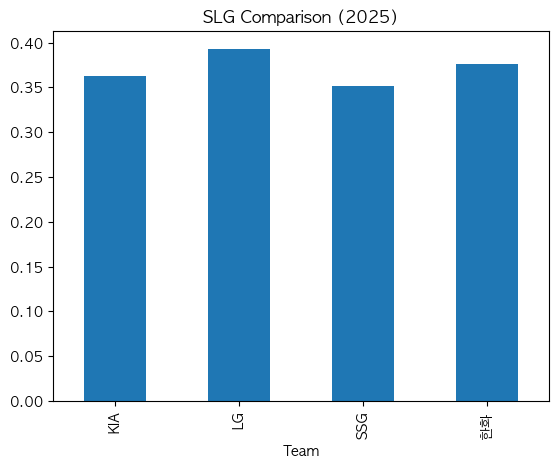

In [93]:
bat_2025.groupby('Team')['SLG'].mean().plot(kind='bar', title='SLG Comparison (2025)')
plt.show()


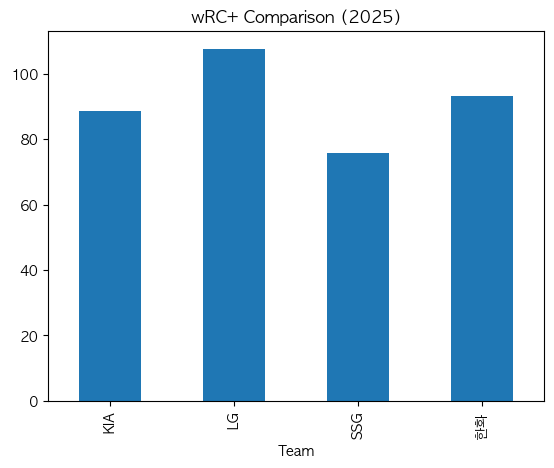

In [94]:
bat_2025.groupby('Team')['wRC+'].mean().plot(kind='bar', title='wRC+ Comparison (2025)')
plt.show()


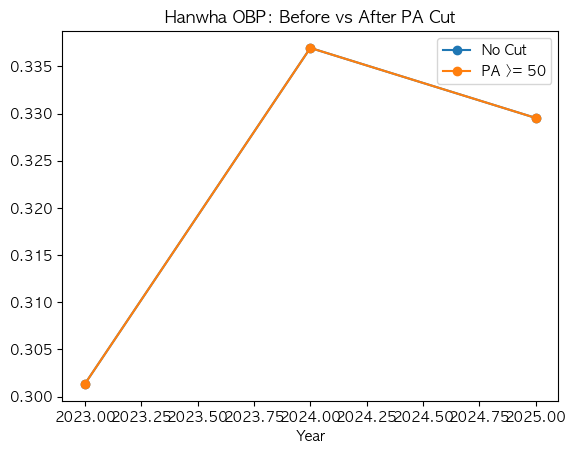

In [95]:
# 컷 적용 전
bat_raw = bat.copy()

bat_raw[bat_raw['Team']=='한화'].groupby('Year')['OBP'].mean().plot(
    marker='o', label='No Cut'
)

# 컷 적용 후
hanwha_bat.groupby('Year')['OBP'].mean().plot(
    marker='o', label='PA >= 50'
)

plt.legend()
plt.title('Hanwha OBP: Before vs After PA Cut')
plt.show()


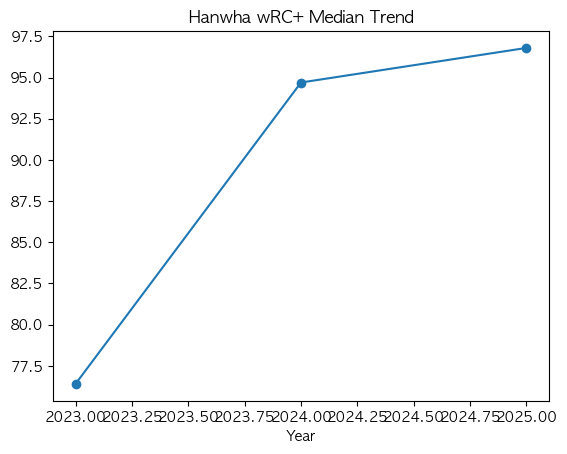

In [96]:
hanwha_bat.groupby('Year')['wRC+'].median().plot(
    marker='o', title='Hanwha wRC+ Median Trend'
)
plt.show()


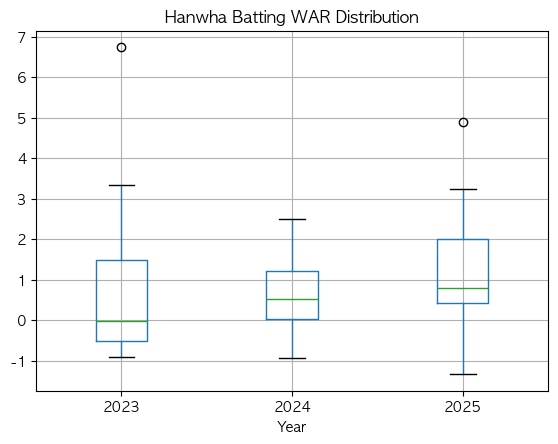

In [97]:
hanwha_bat.boxplot(column='WAR', by='Year')
plt.title('Hanwha Batting WAR Distribution')
plt.suptitle('')
plt.show()


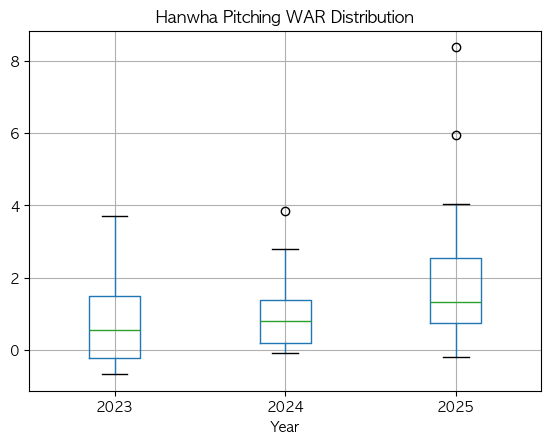

In [98]:
hanwha_pitch.boxplot(column='WAR', by='Year')
plt.title('Hanwha Pitching WAR Distribution')
plt.suptitle('')
plt.show()


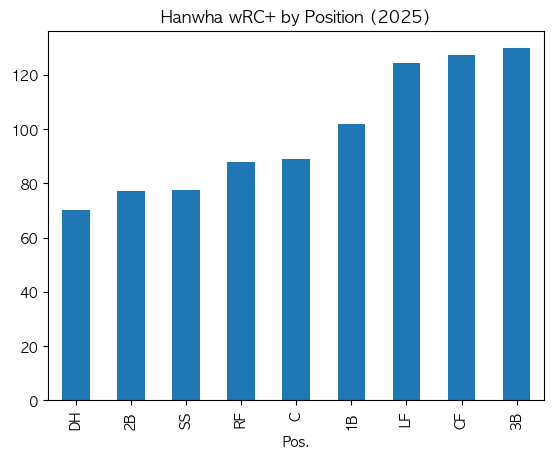

In [99]:
hanwha_2025 = hanwha_bat[hanwha_bat['Year'] == 2025]

hanwha_2025.groupby('Pos.')['wRC+'].mean().sort_values().plot(
    kind='bar', title='Hanwha wRC+ by Position (2025)'
)
plt.show()


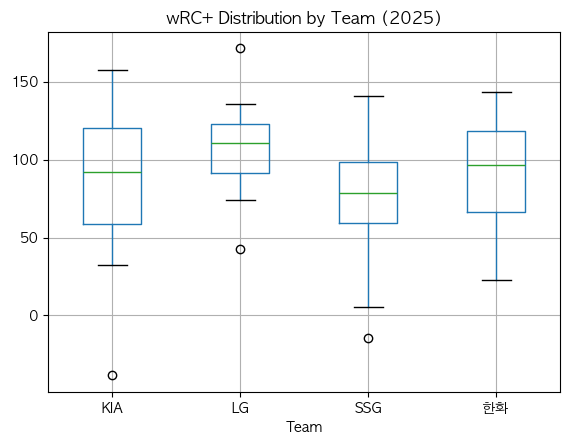

In [100]:
bat_2025 = bat[bat['Year'] == 2025]

bat_2025.boxplot(column='wRC+', by='Team')
plt.title('wRC+ Distribution by Team (2025)')
plt.suptitle('')
plt.show()


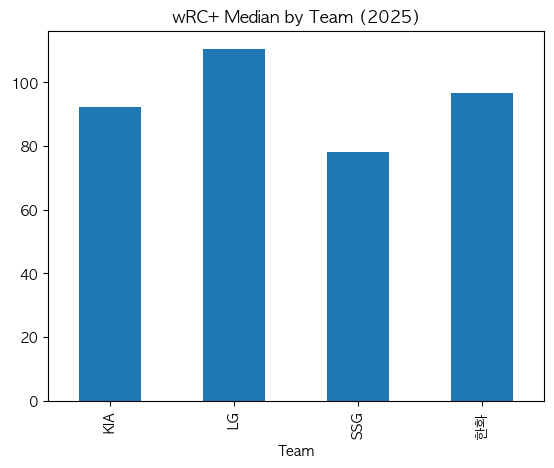

In [101]:
bat_2025.groupby('Team')['wRC+'].median().plot(
    kind='bar', title='wRC+ Median by Team (2025)'
)
plt.show()


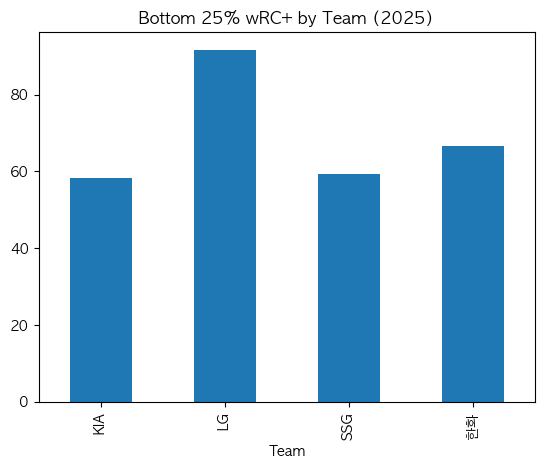

In [102]:
bat_2025.groupby('Team')['wRC+'].quantile(0.25).plot(
    kind='bar', title='Bottom 25% wRC+ by Team (2025)'
)
plt.show()


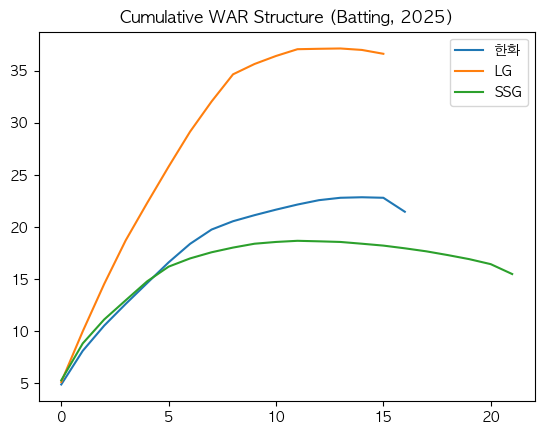

In [103]:
def plot_cum_war(df, team):
    temp = df[df['Team']==team].sort_values('WAR', ascending=False)
    temp['cum_WAR'] = temp['WAR'].cumsum()
    plt.plot(temp['cum_WAR'].values, label=team)

for t in ['한화','LG','SSG']:
    plot_cum_war(bat_2025, t)

plt.legend()
plt.title('Cumulative WAR Structure (Batting, 2025)')
plt.show()


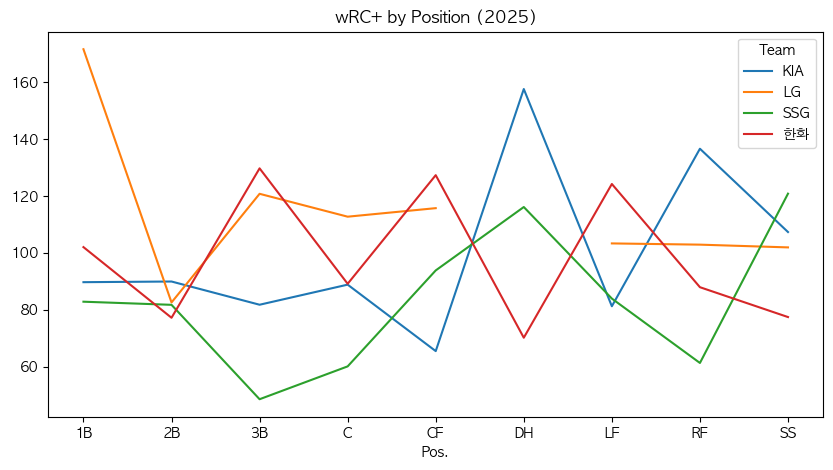

In [104]:
bat_2025.groupby(['Team','Pos.'])['wRC+'].mean().unstack().T.plot(
    figsize=(10,5), title='wRC+ by Position (2025)'
)
plt.show()


NameError: name 'pitch_2025' is not defined

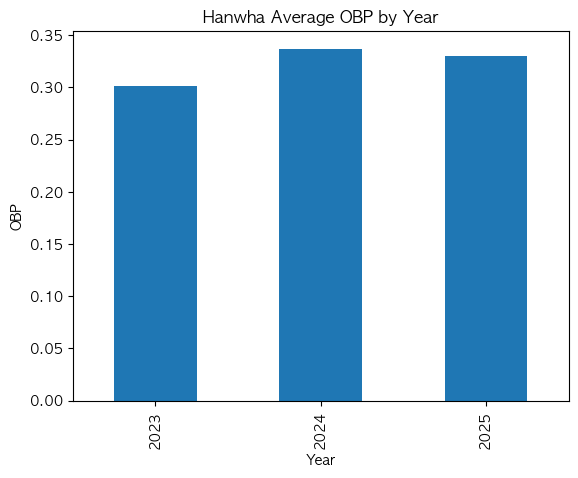

In [18]:
import matplotlib.pyplot as plt

# 연도별 평균 OBP 계산
obp_by_year = hanwha_bat.groupby('Year')['OBP'].mean()

# 막대그래프
obp_by_year.plot(kind='bar')

plt.title('Hanwha Average OBP by Year')
plt.xlabel('Year')
plt.ylabel('OBP')
plt.show()
